In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from collections import OrderedDict, defaultdict

## Load Train and Test Data

In [172]:
#data
train = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/train.csv")
train_copy = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/train.csv")

test = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/test.csv")

In [173]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Preprocessing
### Columns With NaN

In [174]:
train.loc[:, train.isna().any()]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [175]:
def removena(data):
    #LotFrontage: Linear feet of street connected to property. Fill with mean lot frontage in dataset
    data['LotFrontage'] = data['LotFrontage'].fillna(np.mean(data['LotFrontage']))

    #Alley: Type of alley access. Fill NaN with None (assume no alley access)
    data['Alley'] = data['Alley'].fillna('None')

    #MasVnrType: Masonry veneer type. Fill NaN with None (assume no veneer)
    data['MasVnrType'] = data['Alley'].fillna('None')

    #MasVnrArea: Masonry veneer area in square feet. Fill NaN with 0 (assume no veneer)
    data['MasVnrArea'] = data['Alley'].fillna(0)

    #BsmtQual: Height of the basement - assume no basement
    data['BsmtQual'] = data['BsmtQual'].fillna('None')

    #BsmtCond: General condition of the basement - assume no basement
    data['BsmtCond'] = data['BsmtCond'].fillna('None')

    #BsmtExposure: Walkout or garden level basement walls - assume no basement
    data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

    #BsmtFinType1: Quality of basement finished area - assume no basement
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

    #BsmtFinType2: Quality of second finished area (if present) - assume no basement
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
    
    #BsmtFinSF1
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
    
    #BsmtFinSF2
    data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
    
    #BsmtUnfSF
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
    
    #TotalBsmtSF
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
    
    #BsmtFullBath
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
    
    #BsmtHalfBath
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)

    #Electrical: Electrical system - only one house with NaN for this field, set to SBrkr (most common)
    data['Electrical'] = data['Electrical'].fillna('SBrkr')

    #FireplaceQu: Fireplace quality - assume no fireplace, set none
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

    #GarageType: Garage location - set to None, assume no garage 
    data['GarageType'] = data['GarageType'].fillna('None')

    #GarageYrBlt: Year garage was built - set to None, assume no garage 
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna('None')

    #GarageFinish: Interior finish of the garage - set to None, assume no garage 
    data['GarageFinish'] = data['GarageFinish'].fillna('None')

    #GarageQual: Garage quality - set to None, assume no garage 
    data['GarageQual'] = data['GarageQual'].fillna('None')

    #GarageCond: Garage condition - set to None, assume no garage 
    data['GarageCond'] = data['GarageCond'].fillna('None')
    
    #GarageCars
    data['GarageCars'] = data['GarageCars'].fillna(0)
    
    #GarageArea
    data['GarageArea'] = data['GarageArea'].fillna(0)

    #PoolQC: Pool quality - set to None, assume no pool
    data['PoolQC'] = data['PoolQC'].fillna('None')

    #Fence: Fence quality - set to None, assume no fence
    data['Fence'] = data['Fence'].fillna('None')

    #MiscFeature: Miscellaneous feature not covered in other categories, assume no feature
    data['MiscFeature'] = data['MiscFeature'].fillna('None')
    return data  
train = removena(train)
train_copy = removena(train_copy)

### Encoding

In [176]:
train.select_dtypes(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,1999,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,1978,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,1941,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,1950,Unf,TA,TA,Y,None,None,None,WD,Normal


In [177]:
def encode_train():
    # integer encode
    label_encoder = LabelEncoder()
    for col in train.select_dtypes(include = ['object']):
        
        #label_encoder.fit(list(code))
        #data[col] = label_encoder.transform(data[col].astype(str))
        
        #instead of using label encoder, which codes strings alphabetically or one hot encoder, I made a custom dict
        di = (train[[col, 'SalePrice']]
         .groupby(col)
         .mean()
         .sort_values('SalePrice')
         .reset_index()
         .reset_index()[col]
         .to_dict(into=OrderedDict))
        di = {v: k for k, v in di.items()}
        train[col] = train[col].map(di)
    return train

def encode_test():
    # integer encode
    label_encoder = LabelEncoder()
    for col in test.select_dtypes(include = ['object']):
        di = (train_copy[[col, 'SalePrice']]
         .groupby(col)
         .mean()
         .sort_values('SalePrice')
         .reset_index()
         .reset_index()[col]
         .to_dict(into=OrderedDict))
        di = {v: k for k, v in di.items()}
        test[col] = test[col].map(di)
    return test
    
train = encode_train()

### Visualize 

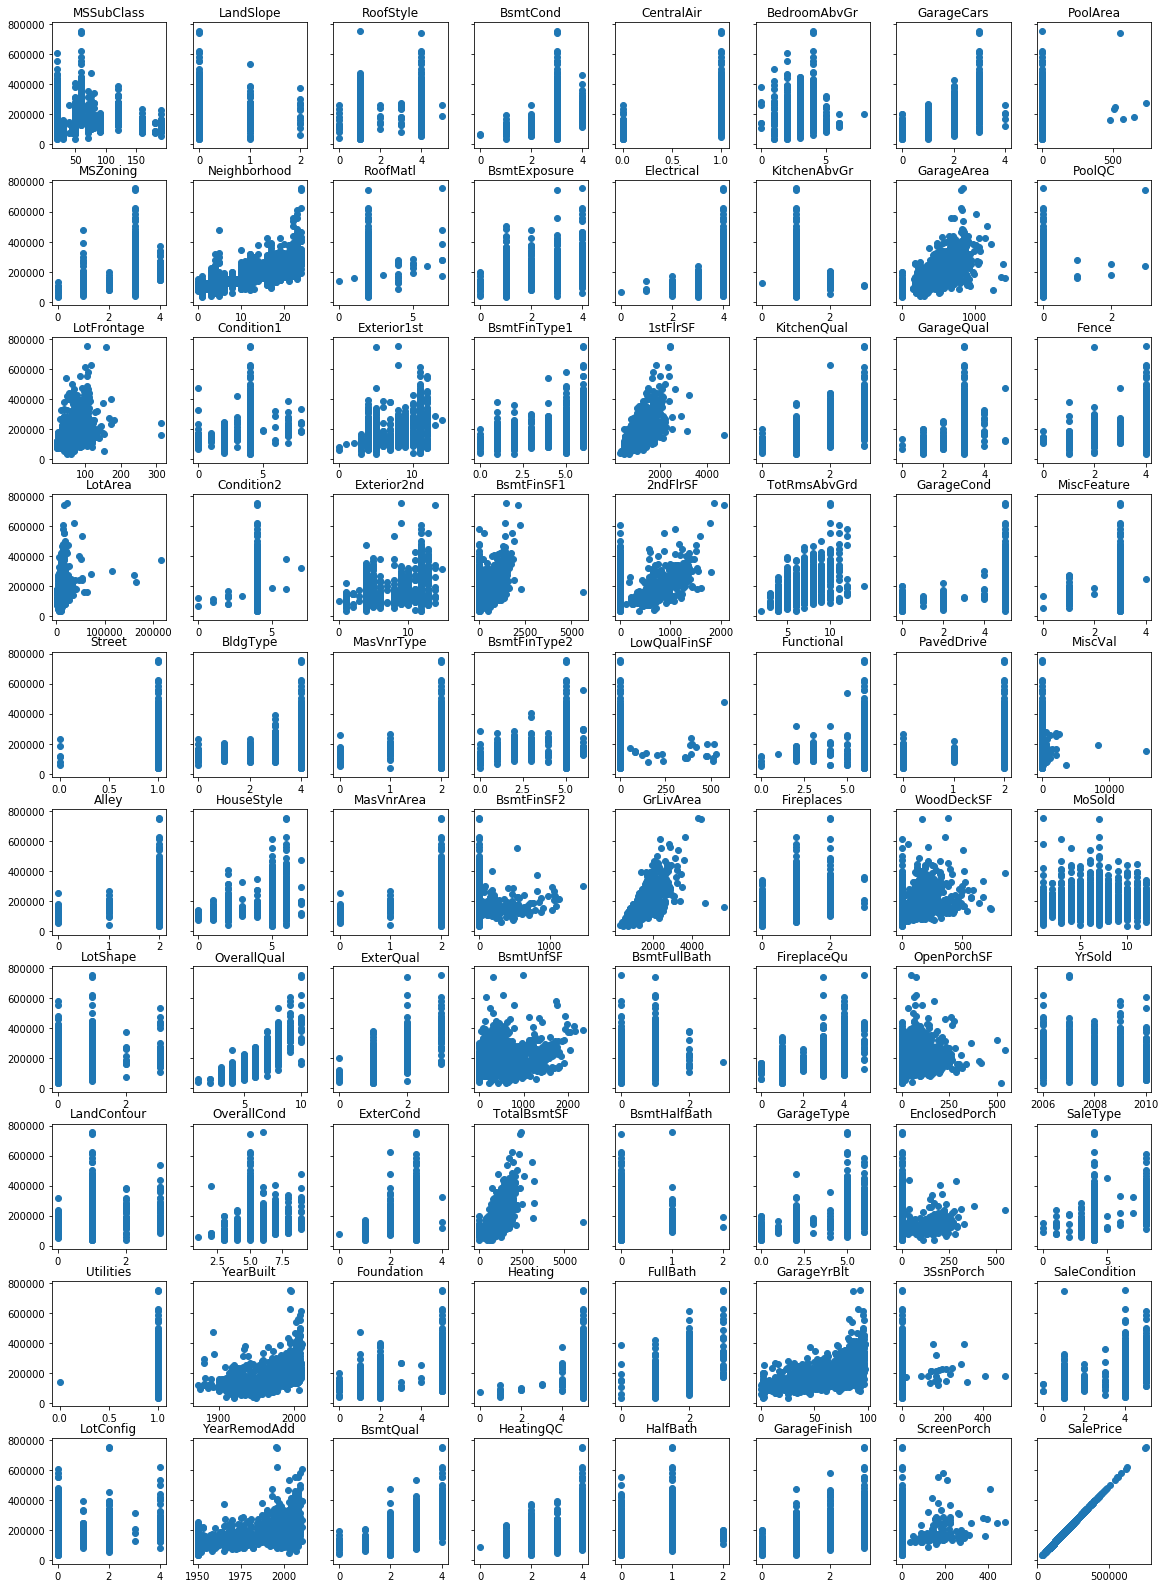

In [178]:
fig, ax = plt.subplots(10, 8, sharey=True,  figsize=(16, 22))
plt.tight_layout()

for y, row in enumerate(ax):
    for x, col in enumerate(row):
    #for column in train.columns:
        column = (train.columns[(train.columns != 'Id')])[x * 10 + y]
        col.scatter(train[column], train['SalePrice'])
        col.set_title(column)

### Transformations

In [179]:
#train['1stFlrSF'] = train['1stFlrSF'].apply(lambda x: np.log(x+1))
#train.BsmtUnfSF = train.BsmtUnfSF.apply(lambda x: np.log(x+1))

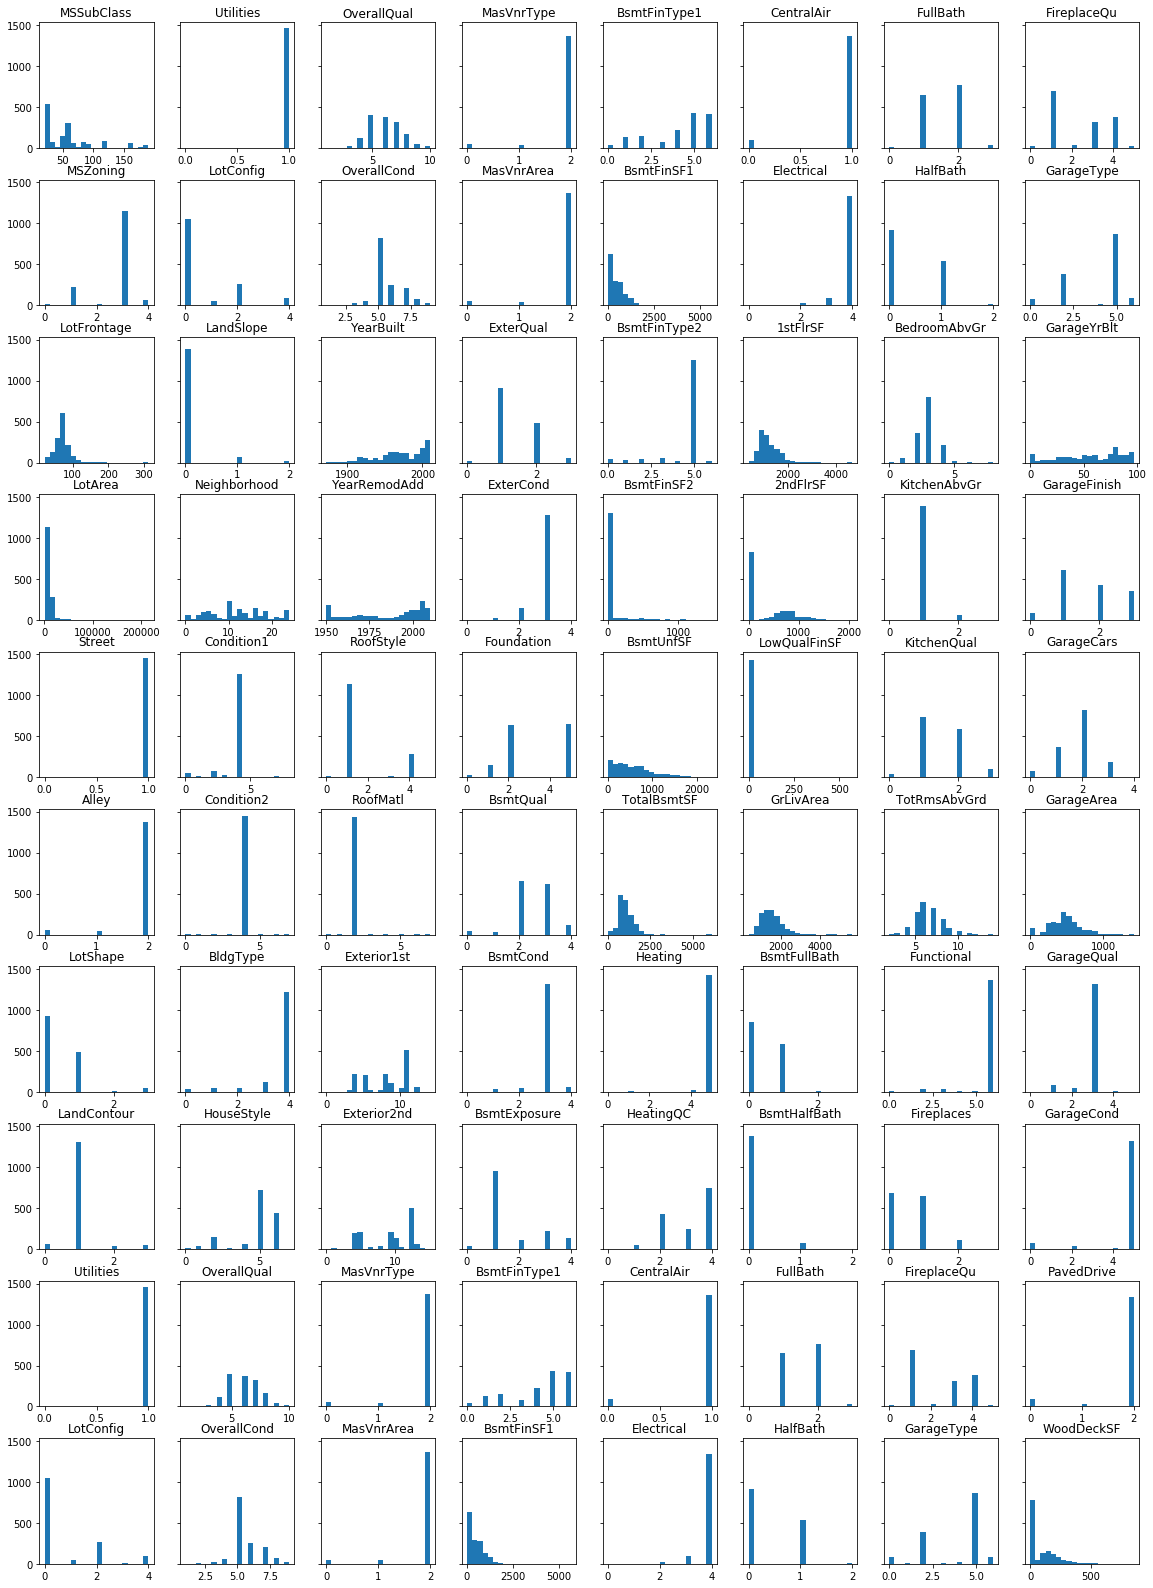

In [180]:
fig, ax = plt.subplots(10, 8, sharey=True,  figsize=(16, 22))
plt.tight_layout()

for y, row in enumerate(ax):
    for x, col in enumerate(row):
    #for column in train.columns:
        column = (train.columns[(train.columns != 'Id') & (train.columns != 'SalePrice')])[x * 8 + y]
        col.hist(train[column], bins = 20)
        col.set_title(column)

In [181]:
X_train =  train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']

In [182]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#Coefficient:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-679530.0585868027
[-2.52717318e+00 -2.47467922e+02 -1.20589092e+03 -1.36590057e+02
  2.09970155e-01  2.08565463e+04  1.22221904e+03 -3.02113838e+02
  4.42562422e+03  6.55236859e+04  1.24810794e+03 -3.31844465e+03
  2.11703771e+03  2.10647191e+03 -9.22153068e+03 -6.35214692e+03
 -9.65258174e+02  9.51493440e+03  4.91641659e+03  3.78479548e+01
 -1.14004560e+02  2.41544172e+03  8.61750003e+03  2.35244044e+02
  9.76830447e+01  1.22221904e+03  1.22221904e+03  1.00824112e+04
  1.19724084e+02  2.80012577e+02  6.62188816e+03 -4.57131440e+03
  5.46223827e+03 -4.33851592e+02  8.18145781e+00  3.72091363e+02
 -1.56484441e+00 -4.39304138e+00  2.22357195e+00 -2.96426276e+01
  1.44359399e+03  1.08588889e+03 -4.31743406e+03  2.59522944e+01
  2.21033627e+01 -2.31960480e+01  2.48596089e+01  4.51774650e+03
 -5.22040653e+02  2.49584267e+03  2.21869984e+03 -4.03439495e+03
 -2.44326390e+04  9.27328133e+03  4.07580535e+03  3.75633404e+03
  2.91853006e+03  8.08248892e+02 -1.09802982e+03 -4.02543022e+01
  4.67

In [183]:
# with statsmodels
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
model.summary()

C:\Users\mkive\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              765.1
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                        0.00
Time:                        23:43:23   Log-Likelihood:                         -17129.
No. Observations:                1460   AIC:                                  3.441e+04
Df Residuals:                    1384   BIC:                                  3.481e+04
Df Model:                          76                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Id               -2.5197      1.978     -1.274      0.203      -6.401       1.361
MSSubClass     -247.4618     40.518     -6.107      0.000    -326.945    -167.979
MSZoning      -1173.8679   1414.729     -0.830      0.407   -3949.112    1601.376
LotFrontage    -135.7639     47.820     -2.839      0.005    -229.572     -41.956
LotArea           0.2084      0.107      1.952      0.051      -0.001       0.418
Street         2.053e+04   1.38e+04      1.483      0.138   -6622.582    4.77e+04
Alley          1225.9881    771.857      1.588      0.112    -288.148    2740.124
LotShape       -313.1525   1464.190     -0.214      0.831   -3185.423    2559.118
LandContour    4420.2732   2003.954      2.206      0.028     489.158    8351.389
Utilities      6.469e+04   3.21e+04      2.018      0.044    1794.506    1.28e+05
LotConfig      1253.5372    757.309      1.655      0.098    -232.060    2739.134
LandSlope     -3287.0161   3662.594     -0.897      0.370   -1.05e+04    3897.819
Neighborhood   2114.4867    233.315      9.063      0.000    1656.798    2572.175
Condition1     2111.9472    874.297      2.416      0.016     396.857    3827.037
Condition2    -9251.4960   3378.628     -2.738      0.006   -1.59e+04   -2623.710
BldgType      -6331.1285   2182.203     -2.901      0.004   -1.06e+04   -2050.346
HouseStyle     -959.6582    706.142     -1.359      0.174   -2344.883     425.567
OverallQual    9535.5249   1202.636      7.929      0.000    7176.339    1.19e+04
OverallCond    4927.8382   1025.533      4.805      0.000    2916.070    6939.606
YearBuilt        33.6755     73.040      0.461      0.645    -109.606     176.957
YearRemodAdd   -115.2498     68.560     -1.681      0.093    -249.743      19.244
RoofStyle      2422.0059    749.501      3.231      0.001     951.725    3892.286
RoofMatl       8581.7746   2098.736      4.089      0.000    4464.727    1.27e+04
Exterior1st     249.0432    646.875      0.385      0.700   -1019.918    1518.004
Exterior2nd      98.5169    570.295      0.173      0.863   -1020.219    1217.253
MasVnrType     1225.9881    771.857      1.588      0.112    -288.148    2740.124
MasVnrArea     1225.9881    771.857      1.588      0.112    -288.148    2740.124
ExterQual      1.013e+04   2556.810      3.962      0.000    5113.197    1.51e+04
ExterCond        89.8463   2123.550      0.042      0.966   -4075.878    4255.571
Foundation      287.4615    842.964      0.341      0.733   -1366.163    1941.086
BsmtQual       6697.7796   2101.337      3.187      0.001    2575.630    1.08e+04
BsmtCond      -4724.0260   2707.356     -1.745      0.081      -1e+04     586.939
BsmtExposure   5428.3673   1007.982      5.385      0.000    3451.030    7405.705
BsmtFinType1   -413.6630    664.

In [184]:
## Removing Variables wit

In [185]:
test = removena(test)
test = encode_test()
for nacolumn in test.loc[:, test.isna().any()].columns:
    test[nacolumn].fillna(test[nacolumn].mode()[0], inplace=True)
#test['1stFlrSF'] = test['1stFlrSF'].apply(lambda x: np.log(x+1))
#test.BsmtUnfSF = test.BsmtUnfSF.apply(lambda x: np.log(x+1))
y_pred = regressor.predict(test)

In [186]:
submission = pd.concat([pd.Series(test.Id), pd.Series(y_pred)], axis=1)
submission.columns = ['Id', 'SalePrice']
submission.head()

,Id,SalePrice
0,1461,116590.694432
1,1462,167427.208353
2,1463,168929.767867
3,1464,188171.934730
4,1465,212027.765256


In [187]:
pd.DataFrame(submission).to_csv("submission.csv", index=False)